## Clustering

In [3]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import make_blobs

# import clustering algs
from sklearn.cluster import KMeans, MeanShift , DBSCAN
from sklearn.model_selection import train_test_split

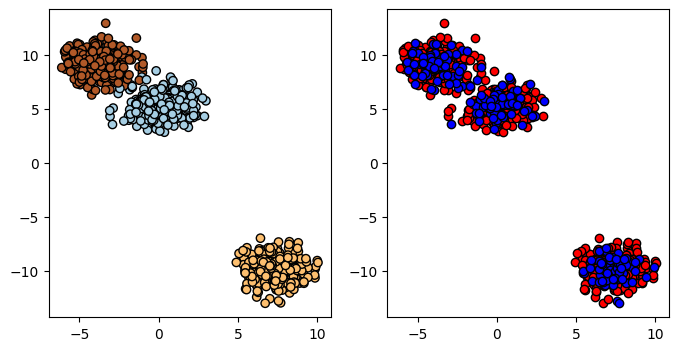

In [14]:
X , y = make_blobs(n_samples = 1000, n_features = 2, random_state=14) #, centers = clusters
X_train , x_test , y_train , y_test = train_test_split(X,y , test_size= 0.2 , random_state = 1)
_, axes = plt.subplots(1 , 2 ,figsize = (8,4))
axes[0].scatter(X[:,0], X[:,1] , c = y , edgecolors = 'k' , cmap = 'Paired')
axes[1].scatter( X_train[:, 0], X_train[:, 1], c = 'r' , edgecolors = 'k')
axes[1].scatter( x_test[:, 0], x_test[:, 1], c = 'b' , edgecolors = 'k')
plt.show()

In [ ]:
# import decision boundaries function


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'DBSCAN' object has no attribute 'predict'

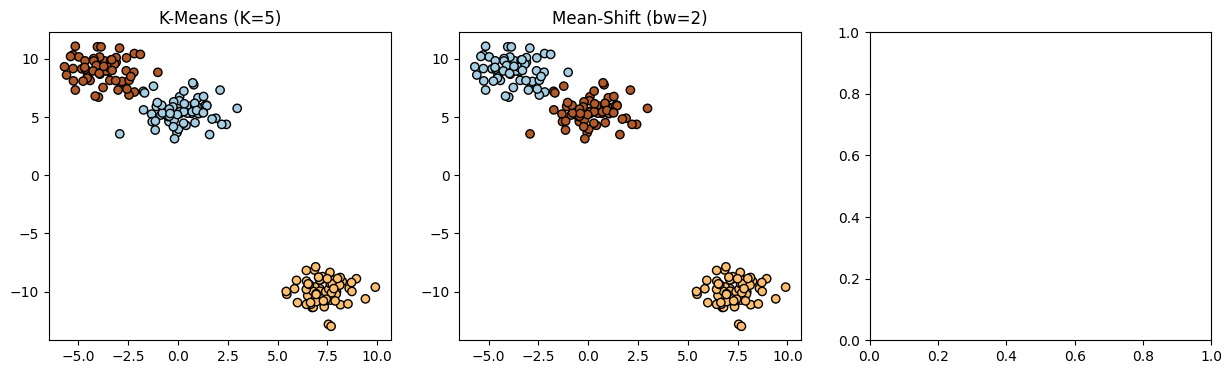

In [32]:
models = [ KMeans(n_clusters=3) , MeanShift(bandwidth=2) , DBSCAN(eps = 1 , min_samples = 5)]


model_names = ['K-Means (K=5)', 'Mean-Shift (bw=2)', 'DBSCAN (eps=1 , min=5)']

_, axes = plt.subplots(1, len(model_names), figsize = (5*len(model_names),4))
predictions = {}

# fit the model
for model,model_name , ax in zip(models , model_names , axes) :
    # Instance and train
    model.fit(X_train)
    if model_name == 'DBSCAN (eps=2 , min=5)':
      predictions[model_name] = model.fit_predict(x_test)
    else:
      predictions[model_name] = model.predict(x_test)

    ax.scatter(x_test[:,0], x_test[:,1], c = predictions[model_name], edgecolors = 'k', cmap = 'Paired')
    ax.set_title(model_name)



plt.show()

## Metrics

The metrics module [Metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de sklearn

In [17]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score , silhouette_score

In [31]:
for model_name in model_names :
  print ("########----- Results for {0} -----########".format( model_name ))
  ari = adjusted_rand_score( y_test , predictions[model_name] )
  ami = adjusted_mutual_info_score( y_test , predictions[model_name] )
  sil = silhouette_score(x_test, predictions[model_name], metric='euclidean' )
  ##--------------
  print("-- ARI --\t -- AMI --\t -- SIL --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami, sil))

########----- Results for K-Means (K=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.971  	   0.952  	   0.731  	
########----- Results for Mean-Shift (bw=2) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.971  	   0.952  	   0.731  	
########----- Results for DBSCAN (eps=2 , min=5) -----########
-- ARI --	 -- AMI --	 -- SIL --
  0.902  	   0.866  	   0.671  	


In [ ]:
## Scores for test data

for i, key in enumerate(predsT.keys()):
  print ("########----- Results for {0} -----########".format( _ ))
  ari = adjusted_rand_score( _ , _ )
  ami = adjusted_mutual_info_score( _ , _ )
  ##--------------
  print("-- ARI --\t -- AMI --\t --")
  print("  {0:.3f}  \t   {1:.3f}  \t   {2:.3f}  \t".format(ari, ami))

## In real data

In [ ]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt

# import data
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()
images = (digits.images > 6) * 1.0

_, axes = plt.subplots(1,10, figsize=(20,4))
for i, ax in enumerate(axes):
  ax.imshow(images[i].reshape(8,8), cmap="gray")

plt.show()